<a href="https://colab.research.google.com/github/whoatharva/Google-genai-colab/blob/main/Google-genai-colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
!pip install -q --upgrade google-generativeai langchain-google-genai chromadb pypdf

In [63]:
from IPython.display import display
from IPython.display import Markdown
import textwrap

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [64]:
import google.generativeai as genai
from google.colab import userdata

In [65]:
import os
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [66]:
model = genai.GenerativeModel(model_name = "gemini-pro")
model

genai.GenerativeModel(
    model_name='models/gemini-pro',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
    cached_content=None
)

In [67]:
response = model.generate_content("What are the usecases of LLMs?")

In [68]:
to_markdown(response.text)

> **Content Generation:**
> * **Text Summarization:** Condensing lengthy documents and providing concise overviews.
> * **Content Writing:** Creating high-quality blog posts, articles, website copy, and other written content.
> * **Scriptwriting:** Writing scripts for movies, TV shows, and video games.
> * **Poetry and Fiction Generation:** Creating unique and engaging poems, short stories, and novels.
> * **Code Generation:** Generating code in various programming languages, assisting in software development.
> 
> **Language Processing:**
> * **Machine Translation:** Translating text from one language to another, improving communication and accessibility.
> * **Sentiment Analysis:** Identifying the emotional tone and sentiment expressed in text.
> * **Question Answering:** Providing accurate answers to complex questions based on a large knowledge base.
> * **Plagiarism Detection:** Identifying instances of potential plagiarism by comparing text to a vast database.
> * **Text Classification:** Categorizing text into predefined classes or labels, aiding in document organization and analysis.
> 
> **Chatbots and Assistants:**
> * **Customer Service:** Providing automated responses to customer inquiries, resolving issues quickly and efficiently.
> * **Virtual Assistants:** Automating tasks such as scheduling appointments, setting reminders, and sending emails.
> * **Entertainment Bots:** Engaging in conversation, playing games, or providing companionship and entertainment.
> * **Tech Support:** Assisting users with troubleshooting technical issues, providing guidance and solutions.
> * **Healthcare Assistants:** Providing information on medical conditions, symptoms, and treatments.
> 
> **Research and Education:**
> * **Literature Review:** Summarizing and analyzing large volumes of research literature.
> * **Scientific Discovery:** Identifying patterns and insights in complex datasets, facilitating new scientific discoveries.
> * **Education Assistance:** Providing personalized learning support, answering student questions, and generating educational content.
> * **Knowledge Management:** Organizing and extracting insights from vast amounts of unstructured data.
> * **Historical Analysis:** Uncovering historical events and trends by analyzing documents and archives.
> 
> **Other Usecases:**
> * **Marketing and Advertising:** Generating targeted marketing campaigns, optimizing ad copy, and creating personalized content.
> * **Social Media Management:** Monitoring social media trends, identifying influencers, and analyzing customer sentiment.
> * **Gaming:** Creating immersive gaming experiences, generating dialogue, and procedurally generating game worlds.
> * **E-commerce:** Personalizing shopping recommendations, providing customer support, and automating inventory management.
> * **Asset Management:** Tracking and analyzing financial data, identifying investment opportunities, and generating reports.

In [69]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [70]:
llm = ChatGoogleGenerativeAI(model="gemini-pro",google_api_key=GOOGLE_API_KEY)

In [71]:
result = llm.invoke("What are the usecases of LLMs?")

In [72]:
to_markdown(result.content)

> **Natural Language Processing (NLP)**
> 
> * **Text generation:** Creating new text, such as articles, stories, or scripts.
> * **Text summarization:** Condensing large texts into concise summaries.
> * **Machine translation:** Translating text between different languages.
> * **Chatbots:** Developing conversational agents that can interact with humans using natural language.
> * **Question answering:** Providing answers to questions based on a given context.
> 
> **Code Generation and Analysis**
> 
> * **Code generation:** Generating code in various programming languages.
> * **Code completion:** Suggesting possible code completions or code snippets.
> * **Code analysis:** Identifying errors, vulnerabilities, and optimization opportunities in code.
> 
> **Education**
> 
> * **Personalized learning:** Providing tailored educational content based on students' individual needs.
> * **Virtual assistants:** Assisting students with homework, answering questions, and providing explanations.
> * **Assessment and evaluation:** Generating questions, grading essays, and providing feedback.
> 
> **Research and Innovation**
> 
> * **Scientific discovery:** Identifying patterns and generating hypotheses in scientific data.
> * **Drug discovery:** Designing new drugs and predicting their potential effectiveness.
> * **Materials science:** Predicting material properties and optimizing manufacturing processes.
> 
> **Business and Industry**
> 
> * **Customer service:** Automating customer interactions and providing personalized support.
> * **Marketing:** Generating marketing copy, analyzing customer feedback, and optimizing campaigns.
> * **Finance:** Predicting financial trends, identifying investment opportunities, and automating risk assessment.
> * **Healthcare:** Diagnosis support, treatment planning, and drug dosage optimization.
> 
> **Other Creative Applications**
> 
> * **Art and design:** Generating unique artwork, designs, and music.
> * **Entertainment:** Writing scripts, generating storylines, and creating virtual characters.
> * **Personalization:** Customizing experiences, such as email newsletters, social media feeds, and product recommendations.

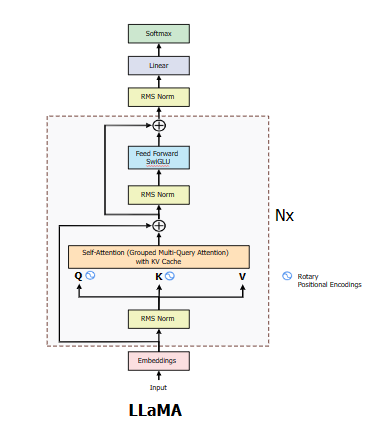

In [73]:
import PIL.Image

img = PIL.Image.open('/content/llama3.png')
img

In [74]:
!sudo apt -y -qq install tesseract-ocr libtesseract-dev

!sudo apt-get -y -qq install poppler-utils libxml2-dev libxslt1-dev antiword unrtf poppler-utils pstotext tesseract-ocr flac ffmpeg lame libmad0 libsox-fmt-mp3 sox libjpeg-dev swig

!pip install langchain

libtesseract-dev is already the newest version (4.1.1-2.1build1).
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [75]:
!pip install langchain-community

In [76]:
import urllib
import warnings
from pathlib import Path as p
from pprint import pprint

import pandas as pd
from langchain import PromptTemplate
from langchain.chains.question_answering import load_qa_chain
from langchain_community.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
from langchain.chains import RetrievalQA



warnings.filterwarnings("ignore")
# restart python kernal if issues with langchain import.

In [77]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [78]:
model = ChatGoogleGenerativeAI(model="gemini-pro",google_api_key=GOOGLE_API_KEY,
                             temperature=0.5,convert_system_message_to_human=True)

In [79]:
pdf_loader = PyPDFLoader("/content/AI_Shortnotes.pdf")
pages = pdf_loader.load_and_split()
print(pages[3].page_content)

Untitled
4
  Machine Le ar ning ML
ML in v ol v es training algor ithms t o le ar n p at t er ns and mak e pr edictions  
fr om dat a without being e xplicitl y pr ogrammed.
T ypes of ML include super vised le ar ning, unsuper vised le ar ning, and  
r einf or cement le ar ning.
Super vised le ar ning uses labeled dat a t o train models t o mak e  
pr edictions or classify ne w dat a.
Unsuper vised le ar ning in v ol v es finding p at t er ns or structur e in  
unlabeled dat a.
R einf or cement le ar ning uses a r e war d syst em t o guide an agent  
t o war ds optimal actions in a giv en en vir onment.
  Deep Le ar ning:
Deep le ar ning is a subset of ML that uses ar tificial neural net w or ks with  
mul tiple la y ers t o model comple x p at t er ns in lar ge dat aset s.
Deep le ar ning has been p ar ticular l y successful in t asks such as image  
r ecognition, natural language pr ocessing, and speech r ecognition.
  Natur al Language Pr ocessing NLP
NLP f ocuses on ena

In [80]:
len(pages)

29

#**RAG Pipeline: Embedding + Gemini (LLM)**

In [81]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

In [82]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=10000, chunk_overlap=1000)
context = "\n\n".join(str(p.page_content) for p in pages)
texts = text_splitter.split_text(context)

In [83]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001",google_api_key=GOOGLE_API_KEY)

In [84]:
vector_index = Chroma.from_texts(texts, embeddings).as_retriever(search_kwargs={"k":5})

In [85]:
qa_chain = RetrievalQA.from_chain_type(
    model,
    retriever=vector_index,
    return_source_documents=True
    )

In [92]:
question = " what is  Machine Learning?"
result = qa_chain({"query": question})
result["result"]

'Machine learning is a type of artificial intelligence (AI) that allows software applications to become more accurate in predicting outcomes without being explicitly programmed to do so. Machine learning algorithms use historical data as input to predict new output values.'

In [93]:
Markdown(result["result"])

Machine learning is a type of artificial intelligence (AI) that allows software applications to become more accurate in predicting outcomes without being explicitly programmed to do so. Machine learning algorithms use historical data as input to predict new output values.

In [94]:
result["source_documents"]

[Document(page_content='Untitled\n1I n t r o d u c t i o n  t o  A r t i f i c i a l  I n t e l l i g e n c e  ( A I ) :\nAr tificial int elligence le v erages comput ers and machines t o mimic the pr oblem-\nsol ving and decision-making c ap abilities of the human mind. I t is implement ed  \nin machines t o per f or m t asks that actuall y r equir e human int elligence.\nH i s t o r i c a l  B a c k d r o p :\nEar l y Concept s:  The concept of AI dat es b ack t o ancient civilizations, but  \nsignific ant de v elopment s emer ged in the 20 th centur y .\nAlan T ur ing:  T ur ing\'s w or k laid theor etic al f oundations f or AI with his  \nconcept of a univ ersal machine c ap able of per f or ming an y comput ational  \nt ask.\nDar tmout h Conf er ence \ue0811956\ue082\ue092  Coined the t er m "ar tificial int elligence " and  \nmar k ed the f or mal beginning of AI as a field.\nEar l y AI Pr ogr ams:  Pr ograms lik e the Logic Theor ist and General Pr oblem  \nSol v er demonstrat e

In [95]:
template = """Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer. Keep the answer as concise as possible. Always say "thanks for asking!" at the end of the answer.
{context}
Question: {question}
Helpful Answer:"""
QA_CHAIN_PROMPT = PromptTemplate.from_template(template)# Run chain
qa_chain = RetrievalQA.from_chain_type(
    model,
    retriever=vector_index,
    return_source_documents=True,
    chain_type_kwargs={"prompt": QA_CHAIN_PROMPT}
)


In [99]:
question = "Describe NLP?"
result = qa_chain({"query": question})
result["result"]

'Natural Language Processing (NLP) is a field of AI that focuses on enabling computers to understand, interpret, and generate human language. NLP techniques include text classification, sentiment analysis, named entity recognition, and machine translation.'

In [100]:
Markdown(result["result"])

Natural Language Processing (NLP) is a field of AI that focuses on enabling computers to understand, interpret, and generate human language. NLP techniques include text classification, sentiment analysis, named entity recognition, and machine translation.